# Neural Networks

- [Architecture](#architecture)
    - [Activation Funcions](#activation-functions)
    - [Backpropagation](#backpropagation)
- [Multiclass Classification](#multiclass-classification)
    - [Problem Definition](#problem-definition)
    - [Softmax Layer](#softmax-layer)
    - [Cross Entropy](#cross-entropy)
- [Machine Learning](#machine-learning)
    - [Linear Model](#linear-model)
    - [Feedforward Neural Network](#feedforward-neural-network)
- [Challenges](#challenges)

## Architecture  <a class="anchor" id="architecture"></a>

* image used in slides for a feedforward neural network
* elaborate on UAT and relevance to Linear Model

### Activation Functions <a class="anchor" id="activation-functions"></a>

* necessity for non-linearities (basis functions)
* connection to FT

* last layer choice (classification vs. regression)

### Backpropagation <a class="anchor" id="backpropagation"></a>

* derived equations for weights update
* link to chain rule
* code snippets

## Multiclass Classification  <a class="anchor" id="multiclass-classification"></a>

* highlight regression vs classification

### Problem Definition <a class="anchor" id="problem-definition"></a>

* illustrative example, some picture
* mathematical description (finite set of target values)
* idea of one-hot representation

### Softmax Layer <a class="anchor" id="softmax-layer"></a>

* why, compare to a single output where $y_{target} \in \{0, 1, 2, ..., M\}$
* equation, why not a simple frequency measure?

### Cross Entropy <a class="anchor" id="cross-entropy"></a>

* relation to information theory
* loglikelihood (?!)

## Machine Learning  <a class="anchor" id="machine-learning"></a>

In [1]:
# scientific computing library
import numpy as np

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# show plots without need of calling `.show()`
%matplotlib inline

# prettify plots
plt.rcParams['figure.figsize'] = [16.0, 12.0]
sns.set_palette(sns.color_palette("muted"))
sns.set_style("white")

# supress warnings
import warnings
warnings.filterwarnings('ignore')

### Data

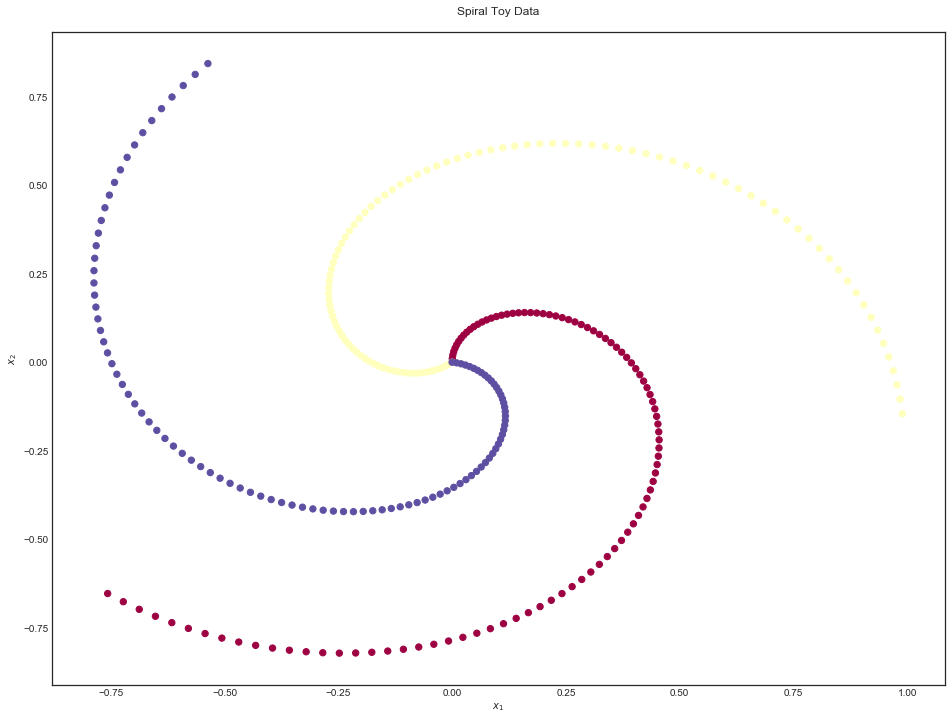

In [2]:
# helper module for toy data generation
from adapter import make_spiral, array_to_onehot

# number of samples per class
N = 100
# dimensionality of input space
D = 2
# number of classes to classify
K = 3

# generate toy data
X, _y = make_spiral(N, D, K, one_hot=False)
# convert class label to one_hot vector
y = array_to_onehot(_y, K)

# plot data to 2D plane
plt.scatter(X[:, 0], X[:, 1], c=_y, s=40, cmap=plt.cm.Spectral)
plt.title('Spiral Toy Data\n')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$');

### Linear Model  <a class="anchor" id="linear-model"></a>

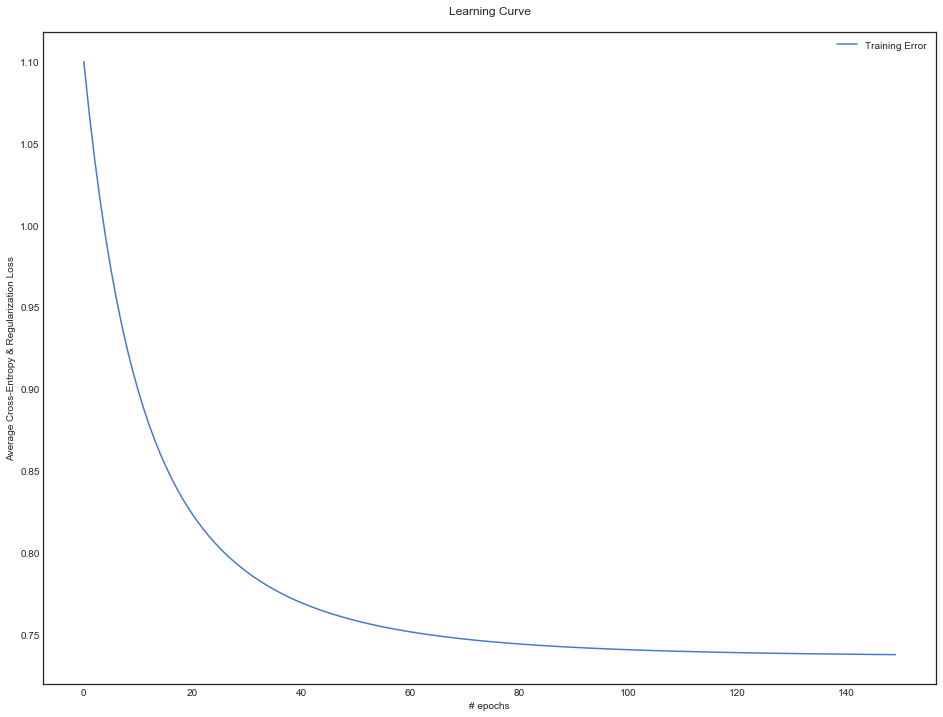

In [3]:
# Train a Linear Classifier

# Model Parameters
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Hyperparameters
eta = 1e-0 # learning rate
reg = 1e-3 # regularization strength
n_epochs = 150 # number of epochs

# Number of datapoints
N = X.shape[0]

# Softmax layer
softmax = lambda s: s / np.sum(s, axis=1, keepdims=True)

# Store history of loss
hist = []

for i in range(n_epochs):
  
    # Feedforward pass: class scores, [N x K]
    scores = np.dot(X, W) + b

    # Convert scores to probabilities
    exp_scores = np.exp(scores)
    # Softmax Layer
    probs = softmax(exp_scores)

    # Average Cross-Entropy Loss
    corect_logprobs = -np.log(probs[range(N),_y])
    data_loss = np.sum(corect_logprobs) / N
    # Regularization Loss
    reg_loss = 0.5 * reg * np.sum(W**2)
    # Sum Losses
    loss = data_loss + reg_loss
    
    # Log
    hist.append(loss)

    # Backward pass: compute gradients
    dscores = probs
    dscores[range(N), _y] = dscores[range(N), _y] - 1
    dscores = dscores / N

    # Compute gradients
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
    # Regularization gradient
    dW = dW + reg*W

    # Update gradients
    W = W - (eta * dW)
    b = b - (eta * db)

# Plot training error
plt.figure()
plt.plot(hist)
plt.title('Learning Curve\n')
plt.xlabel('# epochs')
plt.ylabel('Average Cross-Entropy & Regularization Loss')
plt.legend(['Training Error']);

In [4]:
# Model Evaluation
scores = np.dot(X, W) + b
prediction = np.argmax(scores, axis=1)

'training accuracy: %.3f' % (np.mean(prediction == _y))

'training accuracy: 0.527'

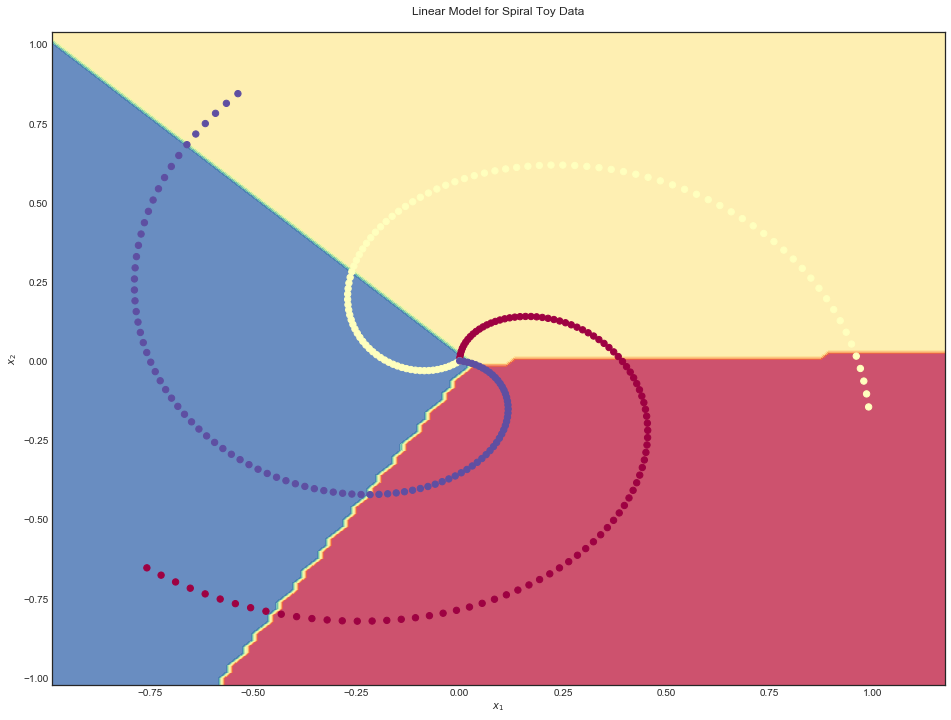

In [5]:
# Plot parameters
h = 0.02 # density
o = 0.2 # offset

# Plot ranges
x_min, x_max = X[:, 0].min() - o, X[:, 0].max() + o # x-range
y_min, y_max = X[:, 1].min() - o, X[:, 1].max() + o # y-range

# 2D grid values of density `h`
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Classify points
Z = np.argmax( np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b, axis=1).reshape(xx.shape)

# Plot separation spaces
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
# Plot input datapoints
plt.scatter(X[:, 0], X[:, 1], c=_y, s=40, cmap=plt.cm.Spectral);
plt.title('Linear Model for Spiral Toy Data\n')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$');

### Feedforward Neural Network  <a class="anchor" id="feedforward-neural-network"></a>

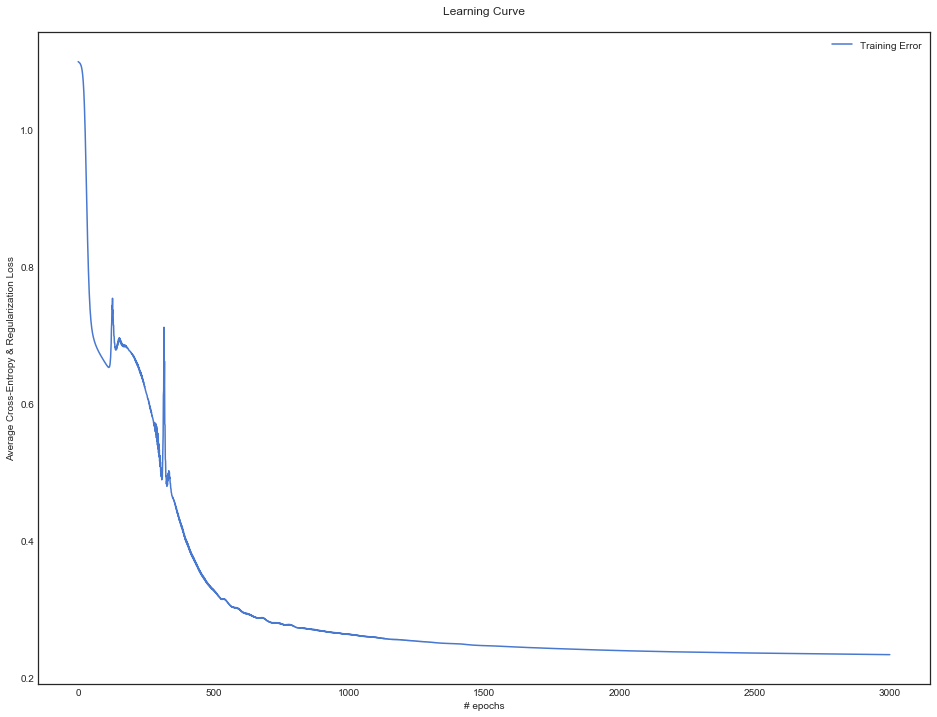

In [6]:
# Train a Single Hidden Layer Feedforward Neural Network

# Hyperparameters
h = 100 # size of hidden layer
eta = 1e-0 # learning rate
reg = 1e-3 # regularization strength
n_epochs = 3000 # number of epochs

# Model Parameters
W1 = 0.01 * np.random.randn(D,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# Number of datapoints
N = X.shape[0]

# ReLU activation function
relu = lambda z: np.maximum(0, z)

# Softmax layer
softmax = lambda s: s / np.sum(s, axis=1, keepdims=True)

# Store history of loss
hist = []

for i in range(n_epochs):
  
    # Feedforward pass: class scores, [N x K]
    hidden_layer = relu(np.dot(X, W1) + b1) # hidden layer
    scores = np.dot(hidden_layer, W2) + b2  # net output

    # Convert scores to probabilities
    exp_scores = np.exp(scores)
    # Softmax Layer
    probs = softmax(exp_scores)

    # Average Cross-Entropy Loss
    corect_logprobs = -np.log(probs[range(N),_y])
    data_loss = np.sum(corect_logprobs) / N
    # Regularization Loss
    reg_loss = 0.5 * reg * (np.sum(W1**2) + np.sum(W2**2))
    # Sum Losses
    loss = data_loss + reg_loss
    
    # Log
    hist.append(loss)
  
    # Backward pass: compute gradients
    dscores = probs
    dscores[range(N), _y] -= 1
    dscores = dscores / N

    # Compute gradients
    # Backprop: W2, b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # Backprop: hidden layer
    dhidden = np.dot(dscores, W2.T)
    # Backprop: ReLU
    dhidden[hidden_layer <= 0] = 0
    # Backprop: W1, b1
    dW1 = np.dot(X.T, dhidden)
    db1 = np.sum(dhidden, axis=0, keepdims=True)

    # Regularization gradient
    dW2 = dW2 + (reg * W2)
    dW1 = dW1 + (reg * W1)

    # Update gradients
    W1 = W1 - (eta * dW1)
    b1 = b1 - (eta * db1)
    W2 = W2 - (eta * dW2)
    b2 = b2 - (eta * db2)

# Plot training error
plt.figure()
plt.plot(hist)
plt.title('Learning Curve\n')
plt.xlabel('# epochs')
plt.ylabel('Average Cross-Entropy & Regularization Loss')
plt.legend(['Training Error']);

In [7]:
# Model Evaluation
hidden_layer = relu(np.dot(X, W1) + b1)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
'training accuracy: %.3f' % (np.mean(predicted_class == _y))

'training accuracy: 0.987'

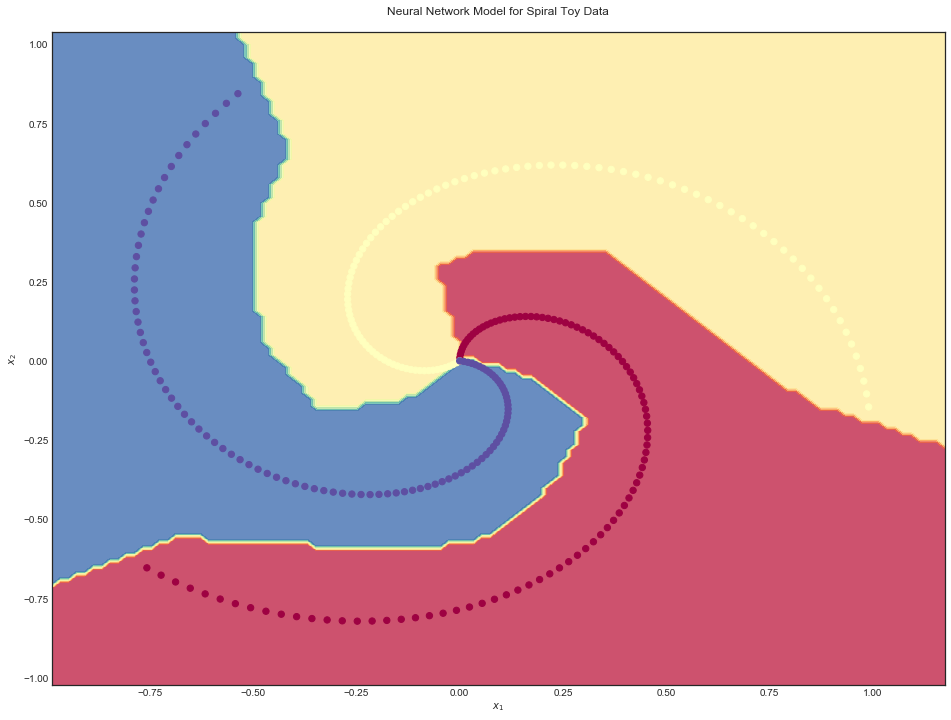

In [8]:
# Plot parameters
h = 0.02 # density
o = 0.2 # offset

# Plot ranges
x_min, x_max = X[:, 0].min() - o, X[:, 0].max() + o # x-range
y_min, y_max = X[:, 1].min() - o, X[:, 1].max() + o # y-range

# 2D grid values of density `h`
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Classify points
Z = np.argmax( np.dot(relu(np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2, axis=1).reshape(xx.shape)

# Plot separation spaces
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
# Plot input datapoints
plt.scatter(X[:, 0], X[:, 1], c=_y, s=40, cmap=plt.cm.Spectral);
plt.title('Neural Network Model for Spiral Toy Data\n')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$');

### [Tensorflow Playground](http://playground.tensorflow.org/)

Binary classification game, built with TensorFlow.

## Challenges  <a class="anchor" id="challenges"></a>